# Introduction to Synthetic Aperture Radar Using Python and MATLAB

## by Andy Harrison - &copy; Artech House 2022

---

## Example 2.12.10 Spotlight SAR Point Spread Function
---

**Import modules**

In [1]:
%matplotlib inline

import numpy as np

from scipy.constants import speed_of_light, pi

from matplotlib import pyplot as plt

**Set the slant range (m)**

In [2]:
slant_range = 100

**Set the synthetic aperture length (m)**

In [3]:
aperture_length = 100e3

**Set the point target location (m)**

In [4]:
x_target = 10

y_target = 5

**Set the waveform bandwidth (Hz)**

In [5]:
waveform_bandwidth = 50e6

**Set the operating frequency (Hz)**

In [6]:
operating_frequency = 1e9

**Calculate the minimum and maximum wavelengths (m)**

In [7]:
wavelength_min = speed_of_light / (operating_frequency + 0.5 * waveform_bandwidth)

wavelength_max = speed_of_light / (operating_frequency - 0.5 * waveform_bandwidth)

**Calculate the minimum and maximum wavenumber (rad/m)**

In [8]:
k_min = 2 * pi / wavelength_max

k_max = 2 * pi / wavelength_min

k_c = speed_of_light / operating_frequency

**Calculate the angles at the endpoints of the synthetic aperture (rad)**

In [9]:
theta_minus = -np.arctan((0.5 * aperture_length - y_target) / (slant_range + x_target))

theta_plus  =  np.arctan((0.5 * aperture_length + y_target) / (slant_range + x_target))


if x_target == 0:

    theta_zero = 0

else:

    theta_zero = np.arctan(y_target / (x_target + slant_range))

**Calculate the spectral support using**

\begin{align}
\Delta k_x^\prime &= 2 \big( k_{max} - k_{min} \big)\hspace{0.1in}\text{(rad/m)}\hspace{0.2in}(2.32)\\ \\ \Delta k_y^\prime &= 2k_c\Big[ \text{sin}\big(\theta_t^+\big) - \text{sin}\big(\theta_t^-\big)\Big]\hspace{0.1in}\text{(rad/m)}\hspace{0.2in}(2.33)
\end{align}

In [10]:
dkx = 2 * (k_max - k_min)

dky = 2 * k_c * (np.sin(theta_plus) - np.sin(theta_minus))

**Calculate the rotation matrix**

In [11]:
R = np.array([[np.cos(theta_zero), -np.sin(theta_zero)], [np.sin(theta_zero), np.cos(theta_zero)]])

**Set up the x and y grid (m)**

In [12]:
x = np.linspace(-20, 20, 1000)

y = np.linspace(-20, 20, 1000)

[xs, ys] = np.meshgrid(x, y)

**Get the rotated mesh (m)**

In [13]:
xp = np.zeros([1000, 1000])

yp = np.zeros([1000, 1000])


for i in range(1000):
    
        for j in range(1000):
            
            a = (np.array([xs[i,j] - x_target, ys[i,j] - y_target])).dot(R)

            xp[i, j] = a[0]
            
            yp[i, j] = a[1]

**Calculate the point-spread function from**

\begin{equation}
\textrm{psf}=\textrm{sinc}\left(\frac{\Delta \;k_x^{\prime } x^{\prime } \;}{2\;\pi \;}\right)\textrm{sinc}\left(\frac{\Delta \;k_y^{\prime } y^{\prime } \;}{2\pi \;}\right)\hspace{0.2in}(2.34)
\end{equation}

**Calculate the point spread function**

In [14]:
psf = np.sinc(dkx * xp / (2 * pi)) * np.sinc(dky * yp / (2 * pi))

**Plot the results**

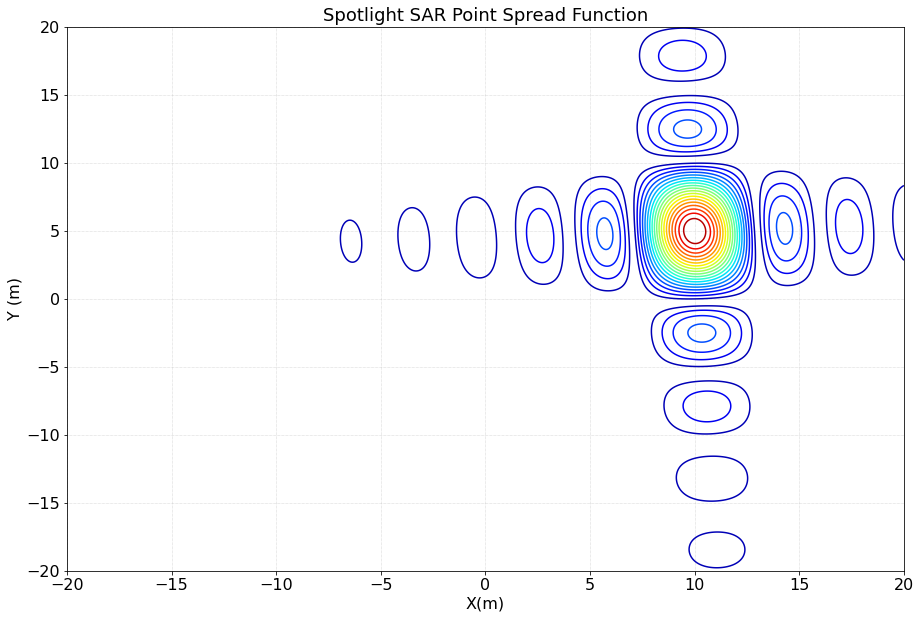

In [15]:
# Set the figure size

plt.rcParams["figure.figsize"] = (15, 10)



# Display the contour plot

plt.contour(xs, ys, abs(psf), 20, cmap='jet')


# Set the plot title and labels

plt.title('Spotlight SAR Point Spread Function', size=18)

plt.xlabel('X(m)', size=16)

plt.ylabel('Y (m)', size=16)


# Set the tick label size

plt.tick_params(labelsize=16)


# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)



# Display the figure

plt.show()